In [2]:
import numpy as np 
from numpy import loadtxt
from keras.models import Sequential
import matplotlib.pyplot as plt 
import keras
from keras.utils import to_categorical
from keras.layers import Flatten, Dense, Activation
from IPython.display import clear_output

In [3]:
def normalisasi(x):
    a = np.max(x)
    b = np.min(x)
    for i in x:
        hasil_normalisasi = (0.8 * (x - b))/(a-b) + 0.1
    return hasil_normalisasi

In [4]:
# Load Txt mulai Tahun 1999 
# sampai dengan Tahun 2022

TPAK = loadtxt('dataset.csv', delimiter=',')
TPAK_normal = normalisasi(TPAK)

TPAK_Target = TPAK[:,10]
TPAK_Target_Uji = TPAK[:,11]

# DATA PELATIHAN =================================
# Data dibagi menjadi 10 variabel input (X) dan 1 variabel output (Y)
# Input : mulai tahun 1997 sampai tahun 2016

X = TPAK_normal[:,0:10]

# Output : data TPT tahun 2017 dan 2018

Y = TPAK_normal[:,10]

# DATA UJI PREDIKSI=================================
# Geser  dua tahun ke depan
# Input : mulai tahun 1999 sampai tahun 2018
# Untuk memprediksi TPT Tahun 2019 dan 2020

X1 = TPAK_normal[:,1:11]

urut = [1,2]


In [5]:
print(TPAK)

[[67.22 68.6  67.86 67.4  66.79 67.41 68.39 67.69 67.63 67.84 68.45 67.94]
 [67.76 67.76 67.55 66.45 67.25 67.77 68.67 67.88 67.2  68.29 68.49 68.84]]


In [6]:
TPAK_normal = normalisasi(TPAK)
print(TPAK_normal)

[[0.35774059 0.81966527 0.57196653 0.41799163 0.21380753 0.42133891
  0.74937238 0.51506276 0.49497908 0.56527197 0.76945607 0.59874477]
 [0.53849372 0.53849372 0.46820084 0.1        0.36778243 0.541841
  0.84309623 0.57866109 0.35104603 0.71589958 0.78284519 0.9       ]]


In [7]:
baris, kolom = TPAK.shape
print("barisnya =",baris)
print("kolomnya =",kolom)

barisnya = 2
kolomnya = 12


In [8]:
baris, kolom = TPAK_normal.shape
print("barisnya =",baris)
print("kolomnya =",kolom)

barisnya = 2
kolomnya = 12


Masukan Jaringan X

In [9]:
baris, kolom = X.shape
print("barisnya =",baris)
print("kolomnya =",kolom)

barisnya = 2
kolomnya = 10


In [10]:
# Mendefinisikan model keras
model = Sequential()
model.add(Dense(10, input_dim=10, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [11]:
# Proses kompilasi (pelatihan) Deep Learning
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mean_squared_error'])

In [12]:
class PlotLosses(keras.callbacks.Callback):
    def on_train_begin(self, logs={}):
        self.i = 0
        self.x = []
        self.losses = []
        self.val_losses = []
        
        self.fig = plt.figure()
        
        self.logs = []

    def on_epoch_end(self, epoch, logs={}):
        
        self.logs.append(logs)
        self.x.append(self.i)
        self.losses.append(logs.get('loss'))
        self.val_losses.append(logs.get('val_loss'))
        self.i += 1
        
        clear_output(wait=True)
        plt.plot(self.x, self.losses, label="loss")
        plt.plot(self.x, self.val_losses, label="val_loss")
        plt.legend()
        plt.grid()
        plt.xlabel('epoch')
        plt.ylabel('loss')
        plt.show();
        
plot_losses = PlotLosses()

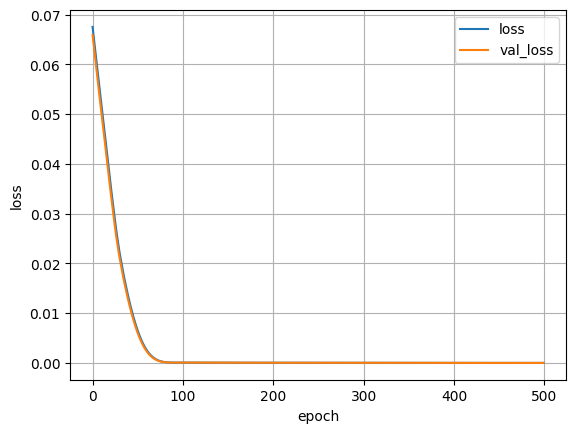

In [13]:
model.fit(X, Y,
          epochs=500,
          validation_data=(X, Y),
          callbacks=[plot_losses],
          verbose=0)

In [14]:
# evaluate the keras model
# Evalusi hasil proses pelatihan Deep Learning
# Hitung akurasi hasil pelatihan dalam bentuk Prosentase Keberhasilan
# Prosentase Keberhasilan = 100 - MAPE

#_, MAPE_pelatihan = model.evaluate(X_normal, Y_normal, batch_size=1)

_, MSE = model.evaluate(X, Y, batch_size=1)

#print('Prosentase_keberhasilan: %.2f' % (100-MAPE_pelatihan))

print('MSE : %.2f' % (MSE))


2/2 [==============================] - 0s 4ms/step - loss: 4.0411e-06 - mean_squared_error: 4.0411e-06
MSE : 0.00


In [15]:
# menjalankan fungsi prediksi
y_pred = model.predict(X)
print(y_pred)

1/1 [==============================] - 0s 85ms/step
[[0.7714121]
 [0.7807821]]


In [16]:
# Denormalisasi Data sebelum dibandngkan

a = np.max(TPAK)
b = np.min(TPAK)

# Rumus
# x_denormalisasi = (((x_normalisasi - 0.1)*(a - b))/0.8) + b

y_prediksi = (((y_pred - 0.1)*(a - b))/0.8) + b

print("y_prediksi =", y_prediksi)

y_prediksi = [[68.45584]
 [68.48383]]


In [17]:
# Urut tahun, menggantikan indeks dari 0 s.d 1
urutan1 = ['2019',
       '2020'
       ]

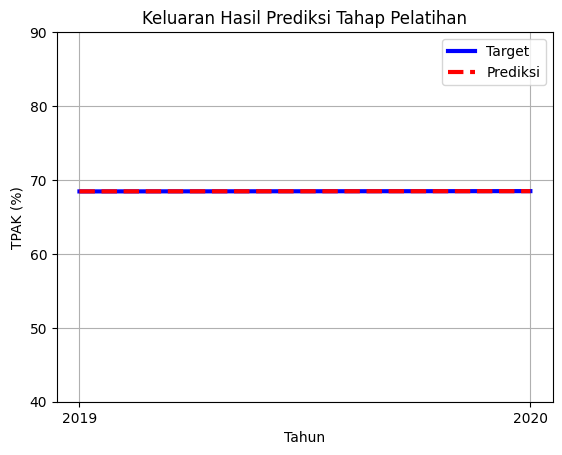

In [18]:
# Plot Keluaran Hasil Prediksi Tahap Pelatihan

plt.title('Keluaran Hasil Prediksi Tahap Pelatihan')
plt.plot(urutan1, TPAK_Target, '-b', label='Target',linewidth=3, markersize=12)
plt.plot(urutan1, y_prediksi, '--r', label='Prediksi', linewidth=3, markersize=12)
plt.legend();
plt.xlabel('Tahun')
plt.ylabel('TPAK (%)')
plt.ylim((40,90))
plt.grid()

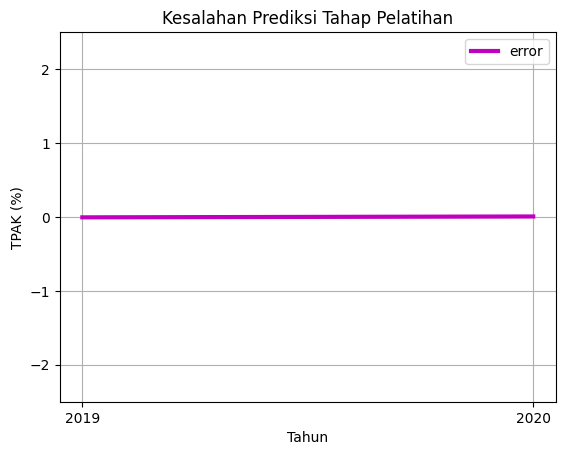

In [19]:
# Plot Kesalahan Prediksi

selisih = TPAK_Target - y_prediksi.transpose()
plt.title('Kesalahan Prediksi Tahap Pelatihan')
plt.plot(urutan1, selisih.transpose(), '-m', label='error', linewidth=3, markersize=12)
plt.legend();
plt.xlabel('Tahun')
plt.ylabel('TPAK (%)')
plt.ylim((-2.5,2.5))
plt.grid()

In [20]:
# Pengukuran kinerja Deep Learning

from sklearn.metrics import mean_squared_error
from math import sqrt
mse  = mean_squared_error(TPAK_Target, y_prediksi)
rmse = sqrt(mse)
print("mse =",mse)
print("rmse =",rmse)

def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

MAPE = mean_absolute_percentage_error(TPAK_Target, y_prediksi)
print("MAPE =",MAPE)

Persentase_keberhasilan = 100-MAPE
print("Persentase_keberhasilan =", Persentase_keberhasilan)

mse = 3.607303132298244e-05
rmse = 0.00600608286014957
MAPE = 0.02920980597262692
Persentase_keberhasilan = 99.97079019402737


In [21]:
# Urut tahun, menggantikan indeks dari 0 s.d 1
urutan2 = ['2021',
       '2022'
       ]

In [22]:
# Ujicoba prediksi
y_uji = model.predict(X1)
print('Hasil prediksi sebelum denormalisasi =', y_uji)

1/1 [==============================] - 0s 22ms/step
Hasil prediksi sebelum denormalisasi = [[0.7785468]
 [0.7577805]]


In [23]:
# Denormalisasi Data sebelum dibandngkan

a = np.max(TPAK)
b = np.min(TPAK)

# Rumus
# x_denormalisasi = (((x_normalisasi - 0.1)*(a - b))/0.8) + b

y_pengujian = (((y_uji - 0.1)*(a - b))/0.8) + b

print("y_pengujian =", y_pengujian)

y_pengujian = [[68.47716 ]
 [68.415115]]


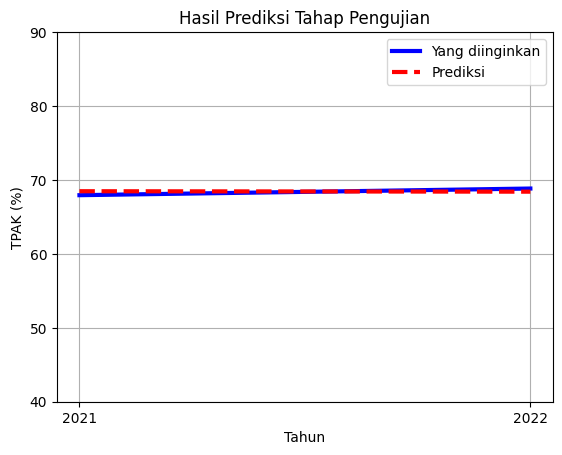

In [24]:
# Plot keluaran hasil prediksi Tahap Pengujian

plt.title('Hasil Prediksi Tahap Pengujian')
plt.plot(urutan2,  TPAK_Target_Uji, '-b', label='Yang diinginkan',linewidth=3, markersize=12)
plt.plot(urutan2, y_pengujian, '--r', label='Prediksi', linewidth=3, markersize=12)
plt.legend();
plt.xlabel('Tahun')
plt.ylabel('TPAK (%)')
plt.ylim((40,90))
plt.grid()

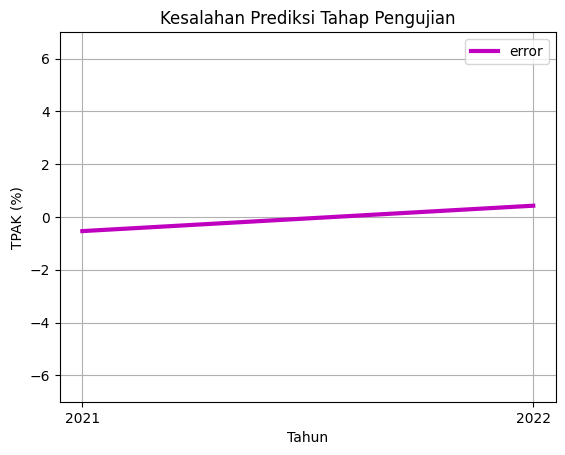

In [25]:
# Plot kesalahan prediksi Tahap Pengujian

selisih_pengujian = TPAK_Target_Uji - y_pengujian.transpose()
plt.title('Kesalahan Prediksi Tahap Pengujian')
plt.plot(urutan2, selisih_pengujian.transpose(), '-m', label='error', linewidth=3, markersize=12)
plt.legend();
plt.xlabel('Tahun')
plt.ylabel('TPAK (%)')
plt.ylim((-7,7))
plt.grid()

In [26]:
# Pengukuran kinerja Deep Learning Tahap Pengujian

from sklearn.metrics import mean_squared_error
from math import sqrt
mse1  = mean_squared_error(TPAK_Target_Uji, y_pengujian)
rmse1 = sqrt(mse1)
print("mse =",mse1)
print("rmse =",rmse1)

MAPE = mean_absolute_percentage_error(TPAK_Target_Uji, y_pengujian)
print("MAPE =",MAPE)

Persentase_keberhasilan = 100-MAPE
print("Persentase_keberhasilan =", Persentase_keberhasilan)

mse = 0.23453261990137664
rmse = 0.484285680049882
MAPE = 0.6585595446604033
Persentase_keberhasilan = 99.3414404553396
